In [5]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pandas as pd

class K_means_classifier:

    def Distance(self, a, b):
        return np.linalg.norm(a - b)

    def __init__(self, k):
        self.k = k
        self.centroids = None

    def fit(self, x, max_iters=100):
        idx = np.random.choice(x.shape[0], self.k, replace=False)
        self.centroids = x[idx]
        for _ in range(max_iters):
            labels = self.CalcSections(x)
            new_centroids = np.array([x[labels == i].mean(axis=0) for i in range(self.k)])
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids

    def CalcSections(self, x):
        labels = np.zeros(x.shape[0])
        for i in range(x.shape[0]):
            distances = [self.Distance(x[i], centroid) for centroid in self.centroids]
            labels[i] = np.argmin(distances)
        return labels

    def predict_kmeans(self, x):
        return self.CalcSections(x)

    def get_centroids(self):
        return self.centroids

    def total_distance(self, x):
        labels = self.CalcSections(x)
        labels = labels.astype(int)

        total_dist = 0
        for i in range(x.shape[0]):
            total_dist += self.Distance(x[i], self.centroids[labels[i]]) ** 2
        return total_dist

    def find_optimal(self, x, max_iters=100, n_init=10):
        best_centroids = None
        best_total_distance = np.inf

        for _ in range(n_init):
            self.fit(x, max_iters)
            current_total_distance = self.total_distance(x)
            if current_total_distance < best_total_distance:
                best_total_distance = current_total_distance
                best_centroids = self.centroids.copy()

        self.centroids = best_centroids


    def plot_clusters(self, x):
        labels = self.predict_kmeans(x)
        n_features = x.shape[1]

        if n_features == 2:
            self._plot_2d(x, labels)
        else:
            for i in range(n_features):
                for j in range(i + 1, n_features):
                    self._plot_2d(x[:, [i, j]], i, j, labels, feature_names=(i, j))
            plt.show()

    def _plot_2d(self, x, i, j, labels, feature_names=None):
        plt.figure()
        scatter = plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', s=50)
        plt.scatter(self.centroids[:, i], self.centroids[:, j], c='red', marker='x', s=100, label='Centroids')

        if feature_names is not None:
            plt.xlabel(f'Feature {feature_names[0]}')
            plt.ylabel(f'Feature {feature_names[1]}')
        else:
            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')

        plt.title('K-means Clustering')
        plt.legend()
        plt.colorbar(scatter)
def Normalize(X):
    return (X)/np.std(X, axis=0)


In [6]:
# Read the CSV file and convert to numpy array
df = pd.read_csv("/content/drive/MyDrive/colab work ML/Data/unsupervised_data.csv")
df.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6
0,1,-21.904591,-22.659091,12.805995,-46.631935,-34.347081,-21.989738
1,2,-28.662385,68.757081,31.761821,3.982259,-62.876866,-61.838563
2,3,-62.551204,60.909235,8.112918,24.110050,-64.372336,70.681940
3,4,14.428024,-48.326045,-65.576518,76.027549,69.966852,48.023953
4,5,9.780285,-55.643172,-72.737299,74.180123,67.873327,41.128015


In [7]:
Y= df.to_numpy()
X=Y[np.random.randint(0,40000,300),1:]
X= Normalize(X)
print(X)

[[-1.18123207 -0.95892526  0.55104886 -0.51747161 -1.36427429 -0.13521495]
 [-0.07050996  0.79565389 -1.36882318  0.10976122  0.21641145 -1.35613738]
 [-0.4553284   1.3383834   1.06249791  0.54907436 -1.32149413 -1.08059184]
 ...
 [-0.66774347 -1.38701304  0.53889092 -0.02089904 -1.18948918  0.08041869]
 [ 0.42065557 -0.72975515 -1.8375005   1.76298241  1.43796719  1.06022467]
 [-0.02736837 -0.64269121  0.68951613 -1.68066068 -0.69471352 -0.58579902]]


<ipython-input-5-5e9a7a69b124>:19: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([x[labels == i].mean(axis=0) for i in range(self.k)])
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Optimal Centroids:
 [[-1.98040421  1.0736169   0.32792304  0.79048419 -1.61817215  1.56240224]
 [ 1.44787693 -0.87151099 -1.23162145 -1.22700784 -0.64370503  0.08153335]
 [-0.29198774 -0.58738773  0.43417095 -1.39550212 -0.68155607 -0.41546544]
 [-0.87990506 -1.16684343  0.7318097  -0.20779004 -1.23918577  0.02957414]
 [-0.59853375  1.31683514  0.88621493  0.40242163 -1.16477785 -1.14552836]
 [-0.22169748  0.82843079 -1.14717776  0.0555258   0.28501826 -1.46046757]
 [ 0.46291672 -0.96039592 -1.68192678  1.70370102  1.56701038  0.97313885]]
Labels: [3. 5. 4. 1. 0. 0. 5. 1. 6. 2. 5. 2. 5. 0. 1. 2. 6. 4. 6. 4. 0. 5. 3. 0.
 4. 5. 6. 5. 1. 5. 3. 1. 1. 5. 4. 3. 6. 3. 5. 2. 2. 4. 2. 3. 2. 4. 5. 4.
 0. 0. 2. 1. 1. 3. 0. 0. 2. 5. 3. 1. 5. 1. 0. 1. 0. 4. 0. 1. 6. 0. 2. 5.
 5. 4. 4. 3. 5. 2. 5. 3. 4. 6. 4. 0. 1. 3. 6. 3. 4. 5. 3. 0. 3. 6. 5. 2.
 5. 5. 4. 4. 6. 3. 0. 3. 2. 6. 5. 3. 5. 1. 3. 0. 5. 0. 4. 1. 3. 6. 1. 5.
 2. 2. 0. 4. 2. 1. 2. 3. 4. 2. 5. 3. 3. 1. 2. 4. 2. 0. 2. 2. 0. 2. 2. 0.
 1. 3. 3

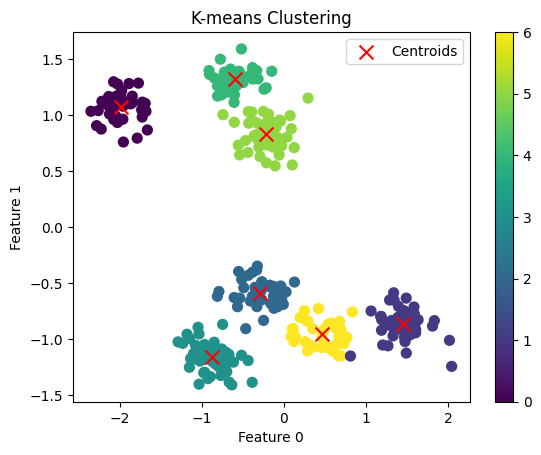

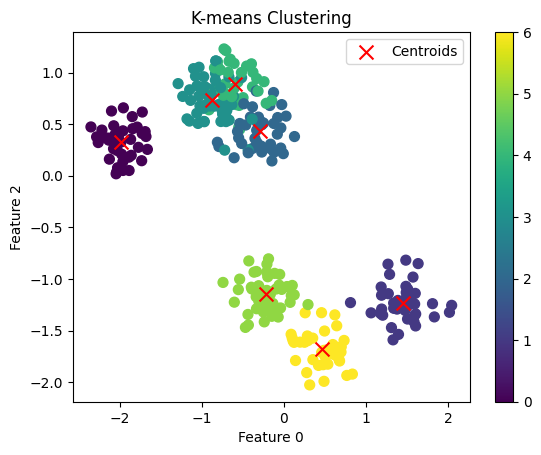

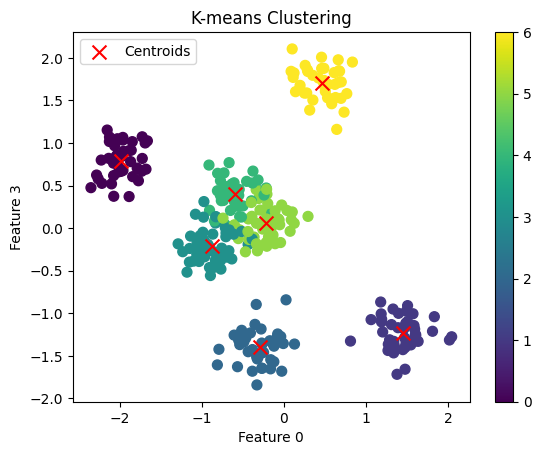

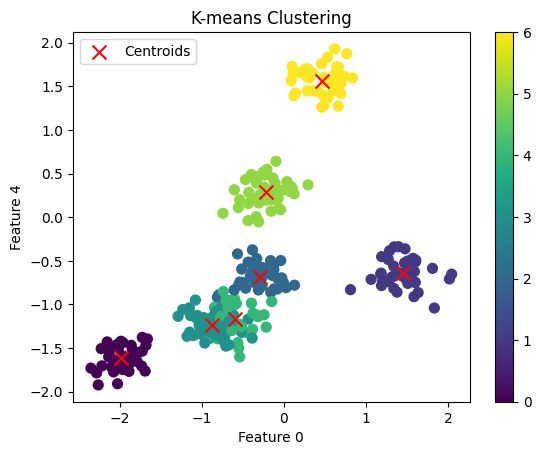

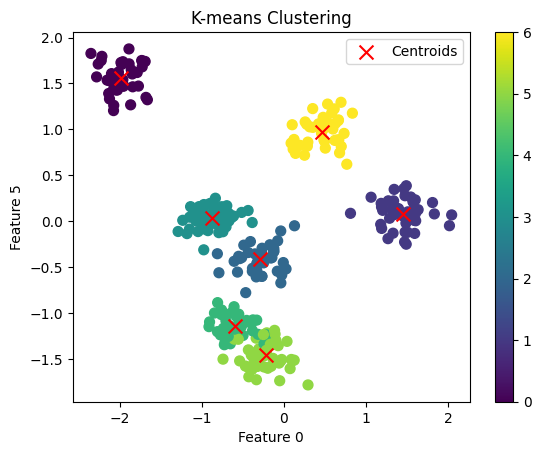

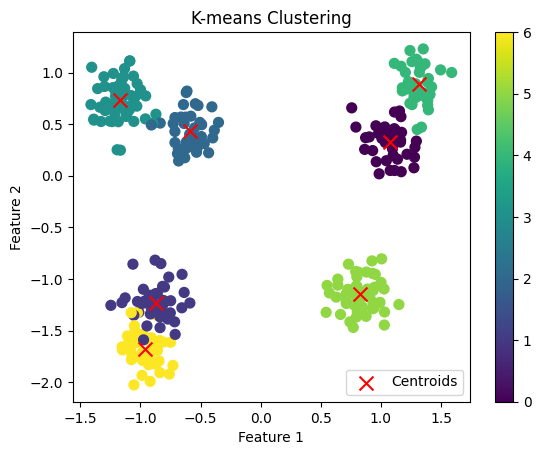

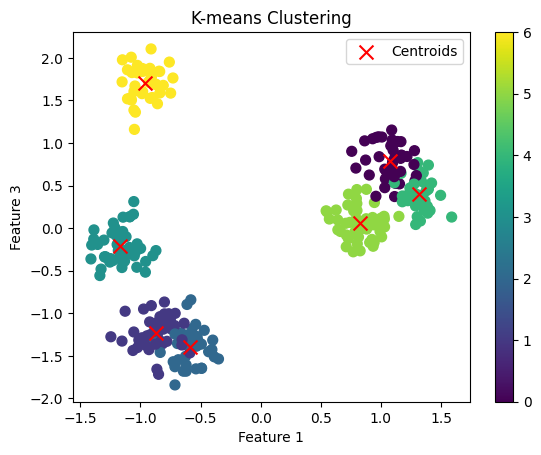

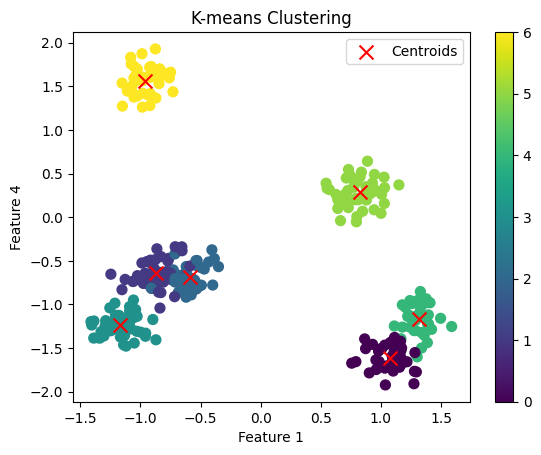

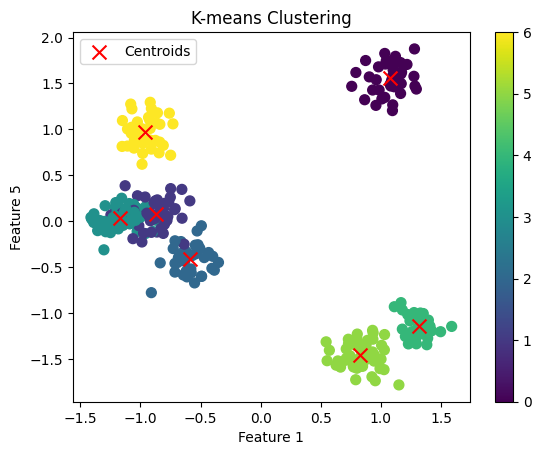

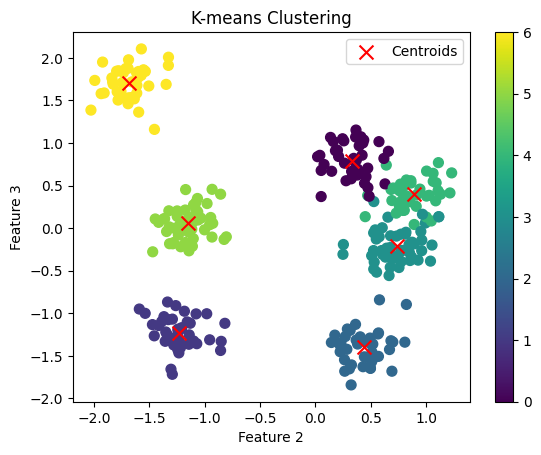

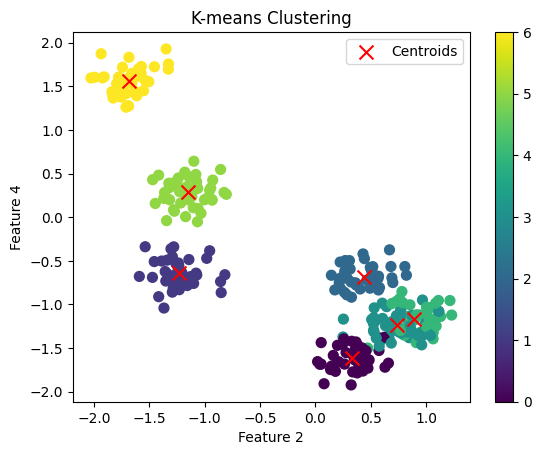

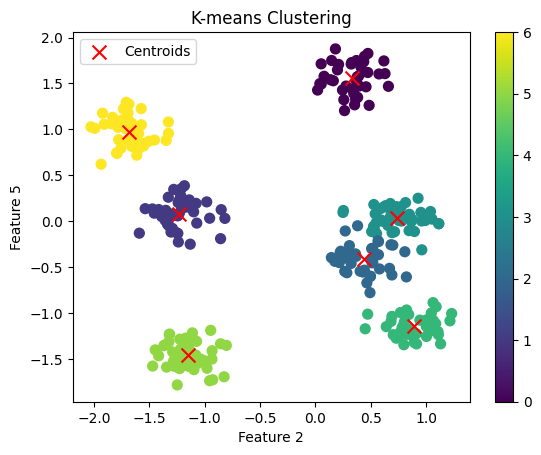

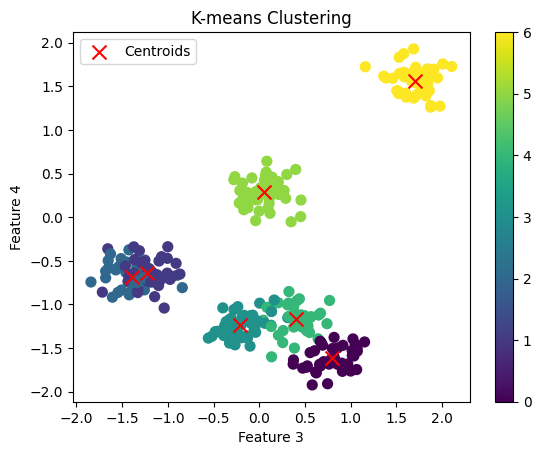

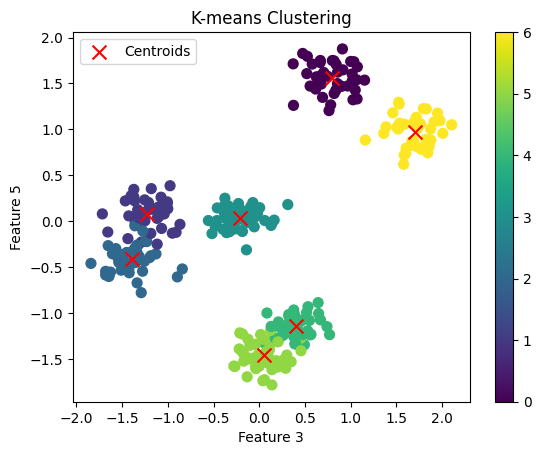

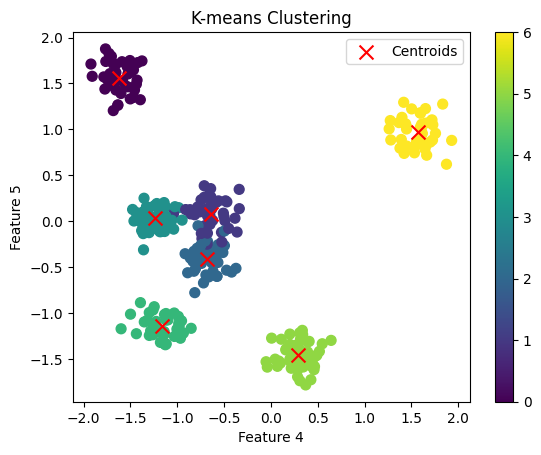

In [8]:
kmeans = K_means_classifier(k=7)
kmeans.find_optimal(X, n_init=100)
Labels = kmeans.CalcSections(X)
print("Optimal Centroids:\n", kmeans.get_centroids())
print("Labels:", Labels)
kmeans.plot_clusters(X)


In [9]:
kmeans = K_means_classifier(k=7)
kmeans.find_optimal(X, n_init=100)
mu = kmeans.get_centroids()
print(mu)

<ipython-input-5-5e9a7a69b124>:19: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([x[labels == i].mean(axis=0) for i in range(self.k)])


[[ 0.46291672 -0.96039592 -1.68192678  1.70370102  1.56701038  0.97313885]
 [-0.22169748  0.82843079 -1.14717776  0.0555258   0.28501826 -1.46046757]
 [-1.98040421  1.0736169   0.32792304  0.79048419 -1.61817215  1.56240224]
 [-0.29198774 -0.58738773  0.43417095 -1.39550212 -0.68155607 -0.41546544]
 [-0.87990506 -1.16684343  0.7318097  -0.20779004 -1.23918577  0.02957414]
 [ 1.44787693 -0.87151099 -1.23162145 -1.22700784 -0.64370503  0.08153335]
 [-0.59853375  1.31683514  0.88621493  0.40242163 -1.16477785 -1.14552836]]


In [10]:
def predict_kmeans_random(X, mu):
    X = Normalize(X)
    Y = []
    for i in range(len(X)):
        distances = []
        for j in range(len(mu)):
            distance = np.sum((X[i] - mu[j])**2)
            distances.append(distance)
        closest_centroid = np.argmin(distances)
        Y.append(closest_centroid)
    return Y

In [11]:
Y=df.to_numpy()
Y=Y[:,1:]
Y = Normalize(Y)
print(Y)

[[-0.62307553 -0.42780366  0.31779933 -1.12951359 -0.72890356 -0.46183722]
 [-0.81530083  1.29813379  0.78821563  0.09645784 -1.3343542  -1.29875809]
 [-1.77926744  1.14996643  0.20133381  0.58399097 -1.36609062  1.48449022]
 ...
 [-0.29922309  0.96957685 -1.11995734  0.04703511  0.2793279  -1.63335667]
 [ 1.34039307 -0.89251253 -1.17095492 -1.28154123 -0.63249783  0.04290412]
 [-0.3465542   0.98661279 -1.04267382  0.34410938  0.01498448 -1.62342805]]


In [12]:
T = predict_kmeans_random(Y,mu)
print(len(T))
value, counts = np.unique(T, return_counts=True)
print(value,counts)
print(T)

40000
[0 1 2 3 4 5 6] [5714 5714 5715 5714 5714 5714 5715]
[3, 6, 2, 0, 0, 4, 6, 2, 3, 2, 2, 0, 0, 4, 5, 1, 6, 1, 4, 1, 5, 3, 4, 6, 5, 4, 3, 3, 4, 5, 1, 5, 3, 6, 3, 3, 1, 5, 1, 6, 3, 0, 5, 1, 4, 2, 3, 2, 0, 6, 3, 6, 3, 5, 3, 2, 3, 3, 5, 2, 4, 0, 4, 4, 6, 1, 3, 3, 5, 5, 6, 2, 6, 6, 4, 0, 5, 6, 6, 0, 5, 5, 6, 1, 2, 5, 1, 5, 3, 4, 4, 3, 2, 2, 6, 2, 0, 6, 5, 4, 6, 4, 3, 1, 4, 6, 2, 0, 0, 2, 3, 6, 2, 4, 1, 2, 2, 1, 0, 4, 2, 5, 6, 3, 3, 4, 6, 3, 1, 0, 1, 6, 2, 4, 4, 0, 2, 0, 2, 3, 6, 0, 2, 3, 3, 5, 6, 1, 3, 5, 0, 4, 2, 5, 2, 3, 3, 1, 2, 3, 1, 1, 3, 1, 6, 1, 2, 1, 5, 0, 6, 2, 3, 5, 3, 6, 6, 0, 6, 3, 2, 6, 1, 0, 1, 1, 1, 0, 6, 1, 5, 1, 0, 2, 2, 2, 6, 1, 4, 0, 6, 4, 6, 1, 5, 0, 2, 5, 4, 0, 5, 4, 6, 4, 2, 5, 2, 1, 0, 4, 6, 6, 4, 2, 1, 3, 5, 2, 2, 4, 2, 6, 0, 0, 6, 4, 4, 1, 1, 6, 6, 5, 6, 4, 0, 5, 6, 1, 5, 1, 3, 4, 4, 1, 5, 1, 6, 5, 0, 0, 0, 1, 0, 2, 2, 6, 2, 4, 0, 6, 1, 1, 2, 2, 5, 2, 1, 2, 4, 0, 4, 2, 1, 3, 0, 6, 6, 4, 5, 4, 5, 0, 2, 1, 3, 3, 2, 3, 2, 5, 5, 3, 4, 2, 0, 2, 6, 1, 6, 4, 2, 0, 5, 2

In [ ]:
df = pd.DataFrame(T)
df.to_csv('output.csv', index=False)

Gaussian classifier for classified data

In [ ]:
class MultivariateGaussianClassifier:
    def __init__(self):
        self.classes = None
        self.means = {}
        self.covariances = {}
        self.priors = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_samples = X.shape[0]

        for c in self.classes:
            X_c = X[y == c]
            self.means[c] = np.mean(X_c, axis=0)
            self.covariances[c] = np.cov(X_c, rowvar=False) + 1e-6 * np.eye(X.shape[1])  # Regularization
            self.priors[c] = X_c.shape[0] / n_samples

    def _multivariate_gaussian_pdf(self, X, mean, covariance):
        n_features = mean.shape[0]
        diff = X - mean
        inv_cov = np.linalg.inv(covariance)
        exponent = -0.5 * np.sum(diff @ inv_cov * diff, axis=1)
        denominator = np.sqrt((2 * np.pi) ** n_features * np.linalg.det(covariance))
        return np.exp(exponent) / denominator

    def predict(self, X):
        posteriors = []

        for c in self.classes:
            likelihood = self._multivariate_gaussian_pdf(X, self.means[c], self.covariances[c])
            posterior = likelihood * self.priors[c]
            posteriors.append(posterior)

        posteriors = np.array(posteriors).T
        return self.classes[np.argmax(posteriors, axis=1)]


In [ ]:
small_labels=kmeans.CalcSections(X)
print(small_labels)
value, counts = np.unique(small_labels, return_counts=True)
print(value)
print(counts)

[3. 2. 2. 3. 5. 1. 0. 2. 3. 4. 6. 0. 1. 0. 4. 2. 1. 3. 3. 5. 6. 2. 5. 1.
 5. 5. 2. 4. 1. 2. 6. 2. 0. 0. 4. 6. 1. 1. 0. 3. 4. 2. 0. 1. 1. 6. 0. 4.
 2. 5. 0. 1. 1. 0. 4. 3. 5. 2. 0. 5. 1. 4. 1. 3. 3. 1. 5. 6. 6. 2. 4. 2.
 5. 3. 2. 5. 3. 0. 2. 6. 5. 3. 6. 0. 3. 5. 3. 4. 4. 0. 0. 5. 5. 6. 1. 1.
 1. 2. 1. 1. 2. 1. 2. 2. 0. 6. 1. 3. 3. 2. 5. 1. 6. 4. 1. 1. 0. 3. 3. 0.
 3. 2. 4. 2. 3. 0. 1. 1. 2. 1. 4. 3. 1. 1. 6. 4. 2. 4. 5. 1. 0. 0. 5. 1.
 1. 5. 6. 1. 6. 1. 0. 5. 4. 5. 4. 0. 3. 0. 4. 6. 0. 3. 5. 3. 1. 0. 2. 0.
 6. 0. 3. 5. 6. 5. 4. 2. 1. 5. 3. 3. 0. 3. 6. 0. 5. 0. 6. 6. 0. 1. 5. 0.
 1. 0. 3. 6. 0. 3. 3. 2. 2. 1. 0. 6. 2. 6. 1. 1. 4. 5. 3. 0. 2. 3. 4. 6.
 6. 6. 3. 0. 3. 2. 1. 5. 3. 0. 0. 0. 0. 1. 5. 0. 3. 0. 2. 0. 6. 6. 4. 2.
 3. 5. 5. 0. 3. 4. 4. 2. 6. 5. 1. 4. 3. 1. 1. 1. 6. 3. 2. 5. 0. 5. 0. 4.
 4. 6. 3. 3. 1. 6. 4. 6. 6. 2. 1. 6. 5. 5. 5. 1. 1. 3. 6. 2. 5. 4. 1. 2.
 5. 3. 3. 6. 3. 2. 5. 4. 5. 5. 4. 0.]
[0. 1. 2. 3. 4. 5. 6.]
[49 52 39 47 32 43 38]


In [ ]:
gaussian_classifier = MultivariateGaussianClassifier()
gaussian_classifier.fit(X, small_labels)

In [ ]:
gaussian_classified_labels = gaussian_classifier.predict(Y)

In [ ]:
print(np.unique(gaussian_classified_labels, return_counts=True))

(array([0., 1., 2., 3., 4., 5., 6.]), array([5715, 5714, 5714, 5714, 5715, 5714, 5714]))


Agglomerative Heirarchial clustering

In [ ]:

def distance_matrix(X):
    X = X.astype(float)
    dist = X[:, np.newaxis, :] - X
    return np.sum((dist)**2, axis=2)

def closest_clusters(dist):
    np.fill_diagonal(dist, np.inf)
    i, j = np.unravel_index(np.argmin(dist), dist.shape)
    return i, j

def agglomerative_clustering(X, num_clust, linkage='single'):
    n_samples = X.shape[0]
    dist = distance_matrix(X)
    np.fill_diagonal(dist, np.inf)

    clusters = [[i] for i in range(n_samples)]

    while len(clusters) > num_clust:
        i, j = closest_clusters(dist)

        new_cluster = clusters[i] + clusters[j]
        clusters.append(new_cluster)

        if linkage == 'single':
            new_distances = np.minimum(dist[i, :], dist[j, :])
        elif linkage == 'complete':
            new_distances = np.maximum(dist[i, :], dist[j, :])
        elif linkage == 'average':
            new_distances = (dist[i, :] + dist[j, :]) / 2
        else:
            raise ValueError("Unsupported linkage type.")

        dist = np.delete(dist, [i, j], axis=0)
        dist = np.delete(dist, [i, j], axis=1)
        new_distances = np.delete(new_distances, [i, j])
        new_distances = np.append(new_distances, [np.inf])

        dist = np.vstack([dist, new_distances[:-1]])
        dist = np.column_stack([dist, new_distances])

        clusters.pop(max(i, j))
        clusters.pop(min(i, j))

    return clusters


def sum_squared_distances(X, clusters):
    total_dist = 0
    for cluster in clusters:
        cluster_points = X[cluster]
        centroid = np.mean(cluster_points, axis=0)
        dist = np.sum((cluster_points - centroid) ** 2)
        total_dist += dist
    return total_dist

def elbow_agglomerative_clustering(X):
    elbow = []
    n_samples = X.shape[0]
    for num_clust in range(1, n_samples + 1):
        clusters = agglomerative_clustering(X, num_clust)
        total_dist = sum_squared_distances(X, clusters)
        elbow.append(total_dist)
    return elbow

def plot_elbow(elbow):
    plt.plot(range(1, len(elbow) + 1), elbow, marker='o')
    plt.title('Elbow Diagram for Agglomerative Clustering')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Squared Distances')
    plt.grid(True)
    plt.show()


In [ ]:
heirarchial_cluster = agglomerative_clustering(X, 7)
print(heirarchial_cluster)

[[74, 234, 287, 293, 212, 103, 78, 166, 2, 247, 41, 121, 57, 109, 21, 71, 26, 7, 102, 1, 128, 29, 273, 175, 97, 31, 100, 221, 69, 123, 204, 48, 199, 258, 283, 239, 15, 136, 200], [117, 252, 220, 131, 107, 266, 198, 232, 108, 213, 224, 81, 84, 267, 124, 181, 244, 8, 55, 194, 178, 210, 63, 120, 64, 257, 197, 240, 18, 73, 76, 218, 39, 292, 0, 163, 156, 290, 3, 118, 17, 161, 86, 289, 281, 170, 179], [173, 177, 151, 284, 66, 22, 241, 288, 249, 19, 242, 138, 49, 294, 56, 4, 75, 296, 25, 278, 24, 223, 80, 91, 276, 72, 259, 145, 209, 297, 162, 59, 277, 171, 85, 92, 153, 110, 230, 190, 184, 142, 261], [201, 144, 149, 268, 12, 147, 286, 96, 280, 164, 98, 106, 62, 143, 101, 253, 111, 65, 189, 176, 52, 129, 44, 127, 28, 99, 229, 250, 206, 222, 43, 139, 51, 114, 16, 126, 95, 207, 279, 132, 60, 36, 254, 94, 5, 133, 115, 192, 274, 255, 23, 37], [140, 38, 233, 90, 169, 32, 299, 191, 50, 33, 42, 180, 183, 196, 188, 193, 185, 167, 6, 77, 83, 11, 260, 119, 53, 231, 104, 155, 160, 125, 228, 211, 226, 46, 

In [ ]:
len(heirarchial_cluster)

7

In [ ]:
def calculate_centroids_heirarchial(X, clusters):
    centroids = []
    for cluster in clusters:
        cluster_points = X[cluster]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
    return np.array(centroids)

In [ ]:
calculate_centroids_heirarchial(X, heirarchial_cluster)

array([[ 0.42557698, -0.97661741, -1.68700712,  1.69209411,  1.53094678,
         0.92126608],
       [ 1.40574924, -0.86842541, -1.22152439, -1.21153985, -0.67375595,
         0.05703618],
       [-0.82008725, -1.180399  ,  0.7363742 , -0.24196439, -1.24341222,
         0.03585623],
       [-0.19142258,  0.81596439, -1.14931067,  0.04389639,  0.30961722,
        -1.42887771],
       [-1.85554897,  1.096318  ,  0.40899686,  0.85787183, -1.60487903,
         1.48559894],
       [-0.55666595,  1.31193503,  0.91800272,  0.35933779, -1.12808003,
        -1.12701874],
       [-0.26797401, -0.60086919,  0.43271268, -1.35040526, -0.6863514 ,
        -0.425139  ]])

In [ ]:
kmeans.get_centroids()

array([[-1.85554897,  1.096318  ,  0.40899686,  0.85787183, -1.60487903,
         1.48559894],
       [-0.19142258,  0.81596439, -1.14931067,  0.04389639,  0.30961722,
        -1.42887771],
       [ 0.42557698, -0.97661741, -1.68700712,  1.69209411,  1.53094678,
         0.92126608],
       [ 1.40574924, -0.86842541, -1.22152439, -1.21153985, -0.67375595,
         0.05703618],
       [-0.55666595,  1.31193503,  0.91800272,  0.35933779, -1.12808003,
        -1.12701874],
       [-0.82008725, -1.180399  ,  0.7363742 , -0.24196439, -1.24341222,
         0.03585623],
       [-0.26797401, -0.60086919,  0.43271268, -1.35040526, -0.6863514 ,
        -0.425139  ]])